# Project description

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

## Project instructions

1. Download the data and resample it by one hour.
2. Analyze the data.
3. Train different models with different hyperparameters. The test sample should be 10% of the initial dataset. 
4. Test the data using the test sample and provide a conclusion.

## Data description

The data is stored in file `taxi.csv`. The number of orders is in the '*num_orders*' column.

## Preparation

In [108]:
import pandas as pd 

from sklearn.model_selection import train_test_split 

import seaborn as sns 

import matplotlib.pyplot as plt 

from statsmodels.tsa.seasonal import seasonal_decompose

In [109]:
try:
    data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
except:
    data = pd.read_csv('taxi.csv', index_col=[0], parse_dates=[0])

In [110]:
data.sort_index(inplace=True) 

In [111]:
print(data.index.duplicated().sum()) 

data = data[~data.index.duplicated(keep='first')] 

data = data.resample('1H').sum()

0


In [112]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [113]:
data.shape

(4416, 1)

In [114]:
data.isna().sum()

num_orders    0
dtype: int64

In [115]:
data.duplicated().sum() 

4165

In [116]:
data = data.drop_duplicates() 

In [117]:
data.duplicated().sum()

0

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-03-01 00:00:00 to 2018-08-31 18:00:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  251 non-null    int64
dtypes: int64(1)
memory usage: 3.9 KB


In [119]:
data.describe()

,num_orders
count,251.000000
mean,130.023904
std,83.203746
min,0.000000
25%,62.500000
50%,125.000000
75%,188.500000
max,462.000000


In [120]:
data = data[data['num_orders'] > 0] 

data.describe()

,num_orders
count,250.000000
mean,130.544000
std,82.960822
min,1.000000
25%,63.250000
50%,125.500000
75%,188.750000
max,462.000000


## Analysis

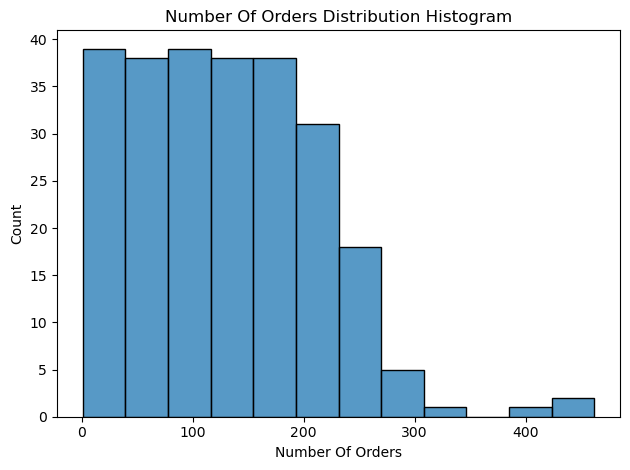

In [121]:
sns.histplot(data['num_orders']) 

plt.title('Number Of Orders Distribution Histogram')
plt.xlabel('Number Of Orders') 
plt.tight_layout()

<Axes: xlabel='datetime'>

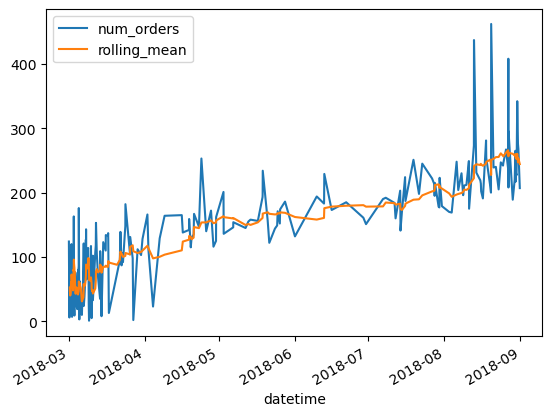

In [122]:
data['rolling_mean'] = data.rolling(10).mean() 

data.plot()

In [123]:
data.isna().sum() 

data = data.dropna(inplace=True) 

In [125]:
data.info()

AttributeError: 'NoneType' object has no attribute 'info'

In [126]:
decomposed = seasonal_decompose(data) 

decomposed.seasonal.plot()

TypeError: len() of unsized object

## Training

## Testing

# Review checklist

- [x]  Jupyter Notebook is open
- [ ]  The code is error-free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  The data has been downloaded and prepared
- [ ]  The data has been analyzed
- [ ]  The model has been trained and hyperparameters have been selected
- [ ]  The models have been evaluated. Conclusion has been provided
- [ ] *RMSE* for the test set is not more than 48